In [37]:
import pandas as pd
import numpy as np
import ast
import os
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import tensorflow as tf
import tensorflow.keras
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import plotly.io as plt_io
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import itertools
from sklearn.utils import class_weight
from tensorflow.keras.models import Model
import random
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve, auc, classification_report
import pickle
%matplotlib inline

In [38]:
songs_df = pd.read_csv('data/cleaned_songs.csv')
songs_df.head()

,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,genres,track_pop,genres_list,subjectivity,polarity
0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),0.904,0.813,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69,"['dance_pop', 'hip_hop', 'hip_pop', 'pop', 'po...",low,Neutral
1,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,Toxic,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,84,dance_pop pop post-teen_pop,83,"['dance_pop', 'pop', 'post-teen_pop']",low,Neutral
2,Beyoncé,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,86,dance_pop pop r&b,25,"['dance_pop', 'pop', 'r&b']",high,Negative
3,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,Rock Your Body,0.892,0.714,4,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,82,dance_pop pop,79,"['dance_pop', 'pop']",low,Neutral
4,Shaggy,1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,0.853,0.606,0,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759,75,pop_rap reggae_fusion,2,"['pop_rap', 'reggae_fusion']",low,Neutral


In [39]:
# drop rows with identical artist_name and track_name
songs_df = songs_df.drop_duplicates(subset=['artist_name', 'track_name'], keep='first')
#add column with the first item in the genres list
songs_df['genre'] = songs_df['genres_list'].apply(lambda x: ast.literal_eval(x)[0])
#drop subjectivity, polarity, genres, genre list and identifiers
songs_df = songs_df.drop(columns=['subjectivity', 'polarity', 'genres', 'genres_list', 'track_name', 'artist_name'])
#drop rows with unknown genre
songs_df = songs_df[songs_df['genre'] != 'unknown']
songs_df.head(25)

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,track_pop,genre
0,0UaMYEvWZi0ZqiDOoHU3YI,0.904,0.813,4,-7.105,0,0.1210,0.031100,0.006970,0.0471,0.810,125.461,74,69,dance_pop
1,6I9VzXrHxO9rA9A5euc8Ak,0.774,0.838,5,-3.914,0,0.1140,0.024900,0.025000,0.2420,0.924,143.040,84,83,dance_pop
2,0WqIKmW4BTrj3eJFmnCKMv,0.664,0.758,2,-6.583,0,0.2100,0.002380,0.000000,0.0598,0.701,99.259,86,25,dance_pop
3,1AWQoqb9bSvzTjaLralEkT,0.892,0.714,4,-6.055,0,0.1410,0.201000,0.000234,0.0521,0.817,100.972,82,79,dance_pop
4,1lzr43nnXAijIGYnCT8M8H,0.853,0.606,0,-4.596,1,0.0713,0.056100,0.000000,0.3130,0.654,94.759,75,2,pop_rap
5,0XUfyU2QviPAs6bxSpXYG4,0.881,0.788,2,-4.669,1,0.1680,0.021200,0.000000,0.0377,0.592,104.997,82,0,atl_hip_hop
6,68vgtRHr7iZHpzGpon6Jlo,0.662,0.507,5,-8.238,1,0.1180,0.257000,0.000000,0.0465,0.676,86.412,82,79,atl_hip_hop
7,3BxWKCI06eQ5Od8TY2JBeA,0.570,0.821,2,-4.380,1,0.2670,0.178000,0.000000,0.2890,0.408,210.857,72,67,dance_pop
8,7H6ev70Weq6DdpZyyTmUXk,0.713,0.678,5,-3.525,0,0.1020,0.273000,0.000000,0.1490,0.734,138.009,75,78,dance_pop
9,2PpruBYCo4H7WOBJ7Q2EwM,0.727,0.974,4,-2.261,0,0.0664,0.103000,0.000532,0.1740,0.965,79.526,77,82,atl_hip_hop


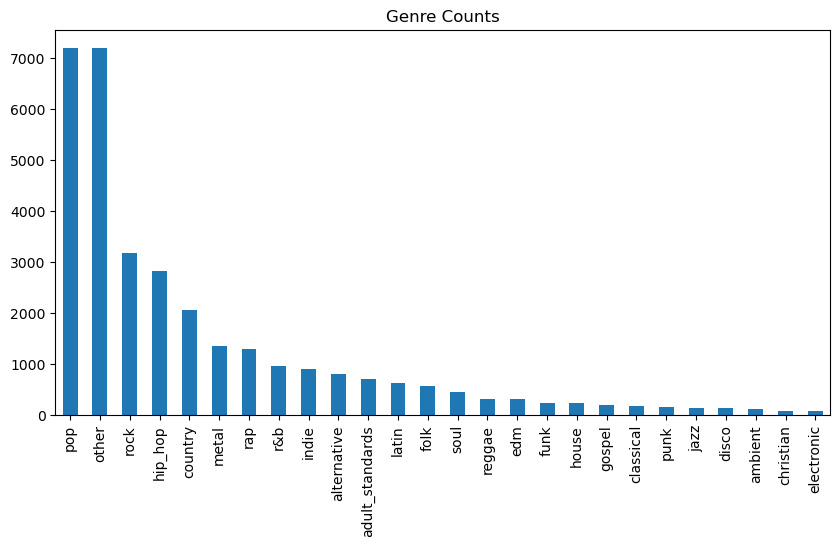

0.2234472049689441
26


In [40]:
#create empty list of length of the dataframe
genre_group = np.empty((len(songs_df), 1)).tolist()
others = []

#add a column that groups genres into categories being pop, rock, hip hop, metal, country, rap, r&b, edm, jazz, soul, blues, reggae, classical, folk
for i, genre in enumerate(songs_df['genre']):

    if 'pop' in genre:
        genre_group[i] = 'pop'
    elif 'rock' in genre:
        genre_group[i] = 'rock'
    elif 'hip_hop' in genre:
        genre_group[i] = 'hip_hop'
    elif 'country' in genre:
        genre_group[i] = 'country'
    elif 'rap' in genre:
        genre_group[i] = 'rap'
    elif 'r&b' in genre:
        genre_group[i] = 'r&b'
    elif 'edm' in genre:
        genre_group[i] = 'edm'
    elif 'jazz' in genre:
        genre_group[i] = 'jazz'
    elif 'soul' in genre:
        genre_group[i] = 'soul'
    elif 'reggae' in genre:
        genre_group[i] = 'reggae'
    elif 'classical' in genre:
        genre_group[i] = 'classical'
    elif 'folk' in genre:
        genre_group[i] = 'folk'
    elif 'metal' in genre:
        genre_group[i] = 'metal'
    elif 'latin' in genre:
        genre_group[i] = 'latin'
    elif 'christian' in genre:
        genre_group[i] = 'christian'
    elif 'gospel' in genre:
        genre_group[i] = 'gospel'
    elif 'indie' in genre:
        genre_group[i] = 'indie'
    elif 'electronic' in genre:
        genre_group[i] = 'electronic'
    elif 'disco' in genre:
        genre_group[i] = 'disco'
    elif 'punk' in genre:
        genre_group[i] = 'punk'
    elif 'funk' in genre:
        genre_group[i] = 'funk'
    elif 'alternative' in genre:
        genre_group[i] = 'alternative'
    elif 'ambient' in genre:
        genre_group[i] = 'ambient'
    elif 'house' in genre:
        genre_group[i] = 'house'
    elif 'adult_standards' in genre:
        genre_group[i] = 'adult_standards'
    else:
        genre_group[i] = 'other'
        others.append(genre)


#make a dictionaty to ttranslate tthese things dict reanslatte what to what

        
#print the value counts of the genres in a grid
pd.Series(genre_group).value_counts().plot(kind='bar', figsize=(10, 5), title='Genre Counts')
plt.show()
#find the number of items in the 'other' category
other_count = pd.Series(genre_group).value_counts()['other']
#divide the number of items in the 'other' category by the total number of items
print(other_count / len(songs_df))
#find the number of unique genres
print(len(pd.Series(genre_group).value_counts()))

In [41]:
#add the genre_group column to the dataframe
songs_df['genre_group'] = genre_group
#drop the genre column
songs_df = songs_df.drop(columns=['genre'])

In [42]:
songs_df.head()

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,track_pop,genre_group
0,0UaMYEvWZi0ZqiDOoHU3YI,0.904,0.813,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,74,69,pop
1,6I9VzXrHxO9rA9A5euc8Ak,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,84,83,pop
2,0WqIKmW4BTrj3eJFmnCKMv,0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,86,25,pop
3,1AWQoqb9bSvzTjaLralEkT,0.892,0.714,4,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,82,79,pop
4,1lzr43nnXAijIGYnCT8M8H,0.853,0.606,0,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759,75,2,pop


In [43]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        print(data.shape)
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.mean_squared_error(data, reconstruction), axis=None
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [44]:
#split the data into train and test with genre_group as the the label
X_train_embedding, X_test_embedding, y_train_embedding, y_test_embedding = train_test_split(songs_df.drop(columns=['genre_group', 'id']), songs_df[['genre_group', 'id']], test_size=0.2, random_state=42, stratify=songs_df['genre_group'])

#preprocessing first
ohe = OneHotEncoder()
scaler = StandardScaler()

#separate into numberical and categorical features
X_train_embedding_num = X_train_embedding.drop(columns=['key', 'mode'])

X_test_embedding_num = X_test_embedding.drop(columns=['key', 'mode'])

#one-hot encode the key label
train_key = ohe.fit_transform(X_train_embedding['key'].values.reshape(-1, 1)).toarray()
test_key = ohe.transform(X_test_embedding['key'].values.reshape(-1, 1)).toarray()

train_mode = X_train_embedding['mode'].values.reshape(-1, 1)
test_mode = X_test_embedding['mode'].values.reshape(-1, 1)

#creating categorical dataframe which combines the one-hot encoded key and the mode
X_train_embedding_cat = np.concatenate((train_key,train_mode), axis=1)
X_test_embedding_cat = np.concatenate((test_key,test_mode), axis=1)

#standardizing the numerical features
X_train_embedding_num = scaler.fit_transform(X_train_embedding_num)
X_test_embedding_num = scaler.transform(X_test_embedding_num)

#concatenate the one-hot encoded key and the numerical features
X_train_embedding = np.concatenate((X_train_embedding_num, X_train_embedding_cat), axis=1)
X_test_embedding = np.concatenate((X_test_embedding_num, X_test_embedding_cat), axis=1)

#print train and test shapes
print(X_train_embedding.shape)
print(X_test_embedding.shape)

(25760, 24)
(6440, 24)


In [45]:
latent_dim = 12

encoder_inputs = keras.Input(shape=(X_train_embedding.shape[1],))
x =layers.Dense(19, activation="relu")(encoder_inputs)
x = layers.Dense(15, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 24)]         0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 19)           475         ['input_5[0][0]']                
                                                                                                  
 dense_11 (Dense)               (None, 15)           300         ['dense_10[0][0]']               
                                                                                                  
 z_mean (Dense)                 (None, 12)           192         ['dense_11[0][0]']               
                                                                                            

In [46]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(15, activation="relu")(latent_inputs)
x = layers.Dense(19, activation="relu")(x)
decoder_outputs = layers.Dense(X_train_embedding.shape[1], activation="tanh")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_12 (Dense)            (None, 15)                195       
                                                                 
 dense_13 (Dense)            (None, 19)                304       
                                                                 
 dense_14 (Dense)            (None, 24)                480       
                                                                 
Total params: 979
Trainable params: 979
Non-trainable params: 0
_________________________________________________________________


In [47]:
# instantiate and run the VAE model
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(X_train_embedding, epochs=50, batch_size=32, shuffle=True)

Epoch 1/50
(32, 24)
(32, 24)
805/805 [==============================] - 2s 2ms/step - loss: 17.4076 - reconstruction_loss: 15.2999 - kl_loss: 0.6330
Epoch 2/50
805/805 [==============================] - 1s 1ms/step - loss: 14.4825 - reconstruction_loss: 13.1308 - kl_loss: 1.1462
Epoch 3/50
805/805 [==============================] - 1s 1ms/step - loss: 13.5779 - reconstruction_loss: 12.0863 - kl_loss: 1.4865
Epoch 4/50
805/805 [==============================] - 1s 1ms/step - loss: 13.3336 - reconstruction_loss: 11.7074 - kl_loss: 1.6122
Epoch 5/50
805/805 [==============================] - 1s 1ms/step - loss: 13.3409 - reconstruction_loss: 11.4215 - kl_loss: 1.7591
Epoch 6/50
805/805 [==============================] - 1s 1ms/step - loss: 12.9297 - reconstruction_loss: 10.9294 - kl_loss: 1.9984
Epoch 7/50
805/805 [==============================] - 1s 1ms/step - loss: 12.7909 - reconstruction_loss: 10.5841 - kl_loss: 2.1643
Epoch 8/50
805/805 [==============================] - 1s 1ms/step

Text(0, 0.5, 'Loss')

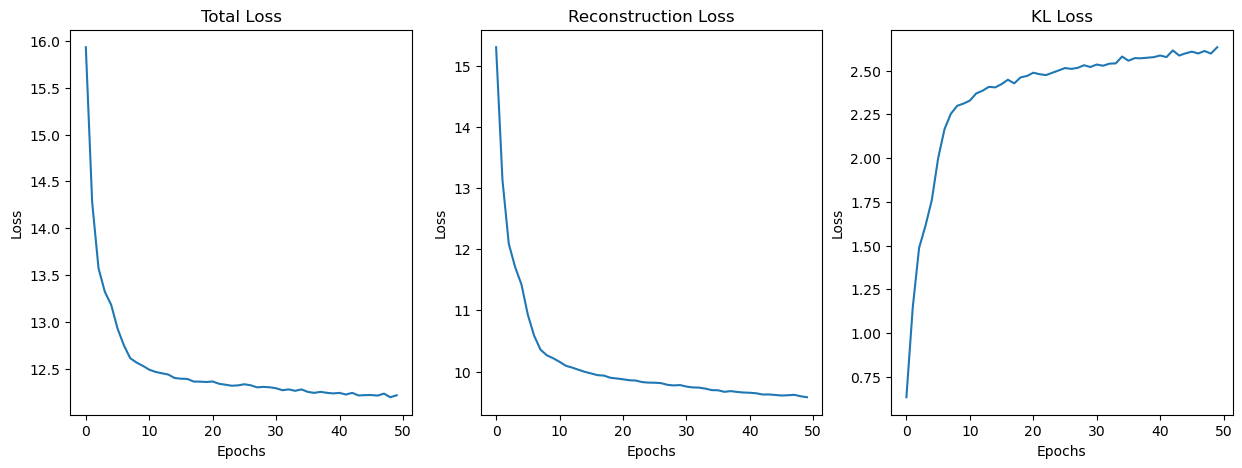

In [48]:
#plot the loss, reconstruction loss, and KL loss 3 in separate plots side by side
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(vae.history.history['loss'])
plt.title('Total Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 3, 2)
plt.plot(vae.history.history['reconstruction_loss'])
plt.title('Reconstruction Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 3, 3)
plt.plot(vae.history.history['kl_loss'])
plt.title('KL Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [49]:
# a list of genre groups for exercising
exercise_genres = ['pop', 'rock', 'hip_hop', 'metal', 'rap', 'edm', 'electronic', 'house', 'punk']
# a list of genre groups for relaxing
relax_genres = ['r&b', 'adult_standards', 'soul', 'reggae', 'classical', 'jazz', 'ambient']
# a list of genre groups for commmuting
commute_genres = ['pop', 'rock', 'country', 'hip_hop', 'funk', 'latin', 'disco', 'folk', 'rap']

In [50]:
latent_space, _, _ = encoder.predict(X_train_embedding)

#a function that finds the centroid of a genre group in the latent space
def find_centroid(genre_group):
    #get the index of each song in the genre group
    genre_group_index = np.where(y_train_embedding == genre_group)[0]
    #get the latent space of the genre group
    #print(genre_group_index.shape)
    genre_group_latent_space = latent_space[genre_group_index, :]
    #find the centroid of the genre group
    centroid = np.mean(genre_group_latent_space, axis=0)
    #find the standard deviation of the genre group
    std = np.std(genre_group_latent_space, axis=0)
    #return the centroid and standard deviation
    return centroid, std

#find the centroid of each genre groups above and store them in a dictionary
exercise_centroids = np.array([find_centroid(genre) for genre in exercise_genres])
relax_centroids = np.array([find_centroid(genre) for genre in relax_genres])
commute_centroids = np.array([find_centroid(genre) for genre in commute_genres])

#combine the centroids into a single array with their original lists as labels
centroids = np.concatenate((exercise_centroids, relax_centroids, commute_centroids), axis=0)
activity_labels = ['exercise'] * len(exercise_centroids) + ['relax'] * len(relax_centroids) + ['commute'] * len(commute_centroids)
genre_group_labels = exercise_genres + relax_genres + commute_genres
centroids.shape

805/805 [==============================] - 1s 658us/step


(25, 2, 12)

In [51]:
#define user object
class User:
    def __init__(self, user_id, exercise_preferences, relax_preferences, commute_preferences):
        self.user_id = user_id
        self.exercise_preferences = exercise_preferences
        self.relax_preferences = relax_preferences
        self.commute_preferences = commute_preferences

    def get_user_id(self):
        return self.user_id
    
    def propose_song(self, song_id, activity):
        if activity == 'exercise':
            return song_id in self.exercise_preferences
        elif activity == 'relax':
            return song_id in self.relax_preferences
        elif activity == 'commute':
            return song_id in self.commute_preferences
        
    def give_preference(self, activity):
        if activity == 'exercise':
            #return a random song from the exercise preferences
            return np.random.choice(self.exercise_preferences)
        elif activity == 'relax':
            #return a random song from the relax preferences
            return np.random.choice(self.relax_preferences)
        elif activity == 'commute':
            #return a random song from the commute preferences
            return np.random.choice(self.commute_preferences)
        


#creating a user object

In [52]:
print(type(y_train_embedding.id.values))
print(y_train_embedding.id.shape)
print(latent_space.shape)

<class 'numpy.ndarray'>
(25760,)
(25760, 12)


In [53]:
def create_users(num_users = 3, randomness_percent = 0.1, centroid_radius = 1, random_radius = None):
    #create a list will all possible combinations for the genre groups in the exercise, relax, and commute categories
    combinations = list(itertools.product(exercise_genres, relax_genres, commute_genres))

    #create an empty dataframe to store the user data
    user_list = []
    for user in range(num_users):
        #get a random combination of genre groups and remove it from the list of combinations
        exercise_genre, relax_genre, commute_genre = combinations.pop(np.random.randint(len(combinations)))

        #get all of the songs in the latent space that are 1 standard deviation away from the centroid of the exercise genre
        exercise_centroid = exercise_centroids[exercise_genres.index(exercise_genre), 0, :]
        exercise_std = exercise_centroids[exercise_genres.index(exercise_genre), 1, :]
        exercise_index = np.where(np.sum(np.abs(latent_space - exercise_centroid) < exercise_std*centroid_radius, axis=1) == latent_dim)[0]

        #get all of the songs in the latent space that are 1 standard deviation away from the centroid of the relax genre
        relax_centroid = relax_centroids[relax_genres.index(relax_genre), 0, :]
        relax_std = relax_centroids[relax_genres.index(relax_genre), 1, :]
        relax_index = np.where(np.sum(np.abs(latent_space - relax_centroid) < relax_std*centroid_radius, axis=1) == latent_dim)[0]

        #get all of the songs in the latent space that are 1 standard deviation away from the centroid of the commute genre
        commute_centroid = commute_centroids[commute_genres.index(commute_genre), 0, :]
        commute_std = commute_centroids[commute_genres.index(commute_genre), 1, :]
        commute_index = np.where(np.sum(np.abs(latent_space - commute_centroid) < commute_std*centroid_radius, axis=1) == latent_dim)[0]

        #convert the latent space to a dataframe
        user_df = pd.DataFrame(latent_space)
        user_df['user'] = user
        user_df['exercise'] = 0
        user_df['relax'] = 0
        user_df['commute'] = 0
        
        #set the exercise column to 1 for all of the songs in the exercise genre
        user_df.loc[exercise_index, 'exercise'] = 1
        #set the relax column to 1 for all of the songs in the relax genre
        user_df.loc[relax_index, 'relax'] = 1
        #set the commute column to 1 for all of the songs in the commute genre
        user_df.loc[commute_index, 'commute'] = 1

        #dict to store activity centroids standard deviations, and indexes
        activity_centroids = {'exercise': exercise_centroid, 'relax': relax_centroid, 'commute': commute_centroid}
        activity_stds = {'exercise': exercise_std, 'relax': relax_std, 'commute': commute_std}

        #add some randomness to the data
        #randomly select a percentage of the songs in each genre and switch the activity column
        for activity in ['exercise', 'relax', 'commute']:

            #get the index of the songs in the acttivity
            genre_index = user_df[user_df[activity] == 1].index
            not_genre_index = user_df[user_df[activity] == 0].index

            if random_radius:
                #get the index of the songs in the latent space that are within the random radius of the centroid
                random_index = np.where(np.sum(np.abs(latent_space - activity_centroids[activity]) < activity_stds[activity]*random_radius, axis=1) == latent_dim)[0]
                #get the index of the songs that are in the genre and within the random radius
                not_genre_index = np.intersect1d(not_genre_index, random_index)


            #get the number of songs to switch
            num_switch = int(len(genre_index) * randomness_percent)
            #get the index of the songs to switch


            switch_index_off = np.random.choice(genre_index, num_switch, replace=False)
            switch_index_on = np.random.choice(not_genre_index, num_switch, replace=False)
            #switch the activity column
            user_df.loc[switch_index_off, activity] = 0
            user_df.loc[switch_index_on, activity] = 1
            #switch the activity column for the other two activities

        #reset the activity indexes
        exercise_index = user_df[user_df['exercise'] == 1].index
        relax_index = user_df[user_df['relax'] == 1].index
        commute_index = user_df[user_df['commute'] == 1].index

        ids = y_train_embedding.id.values

        #get the song ids for the exercise, relax, and commute preferences
        exercise_preferences = ids[exercise_index]
        relax_preferences = ids[relax_index]
        commute_preferences = ids[commute_index]

        #create a user object
        user = User(user, exercise_preferences, relax_preferences, commute_preferences)
        user_list.append(user)

    return user_list

In [54]:
#visualze the preferences for one user in a 2d pca plot
def visualize_user_preferences(user, pca_components=2):
    #get the song ids for the exercise, relax, and commute preferences
    exercise_preferences = user.exercise_preferences
    relax_preferences = user.relax_preferences
    commute_preferences = user.commute_preferences

    #get the latent space for the exercise, relax, and commute preferences
    exercise_latent = latent_space[y_train_embedding.id.isin(exercise_preferences)]
    relax_latent = latent_space[y_train_embedding.id.isin(relax_preferences)]
    commute_latent = latent_space[y_train_embedding.id.isin(commute_preferences)]

    #get the rest of the latent space
    rest_latent = latent_space[~y_train_embedding.id.isin(exercise_preferences) & ~y_train_embedding.id.isin(relax_preferences) & ~y_train_embedding.id.isin(commute_preferences)]

    #fit a pca model to the latent space
    pca = PCA(n_components=pca_components)
    pca.fit(latent_space)

    #get the pca components for the exercise, relax, and commute preferences
    exercise_pca = pca.transform(exercise_latent)
    relax_pca = pca.transform(relax_latent)
    commute_pca = pca.transform(commute_latent)
    rest_pca = pca.transform(rest_latent)


    #plot the exercise, relax, and commute preferences
    plt.figure(figsize=(10, 10))

    plt.scatter(rest_pca[:, 0], rest_pca[:, 1], c='k', label='other')
    plt.scatter(exercise_pca[:, 0], exercise_pca[:, 1], c='r', label='exercise')
    plt.scatter(relax_pca[:, 0], relax_pca[:, 1], c='b', label='relax')
    plt.scatter(commute_pca[:, 0], commute_pca[:, 1], c='g', label='commute')
    
    plt.legend()
    plt.show()

In [55]:
import plotly.graph_objects as go
from sklearn.decomposition import PCA

def visualize_user_preferences(user, pca_components=2):
    #get the song ids for the exercise, relax, and commute preferences
    exercise_preferences = user.exercise_preferences
    relax_preferences = user.relax_preferences
    commute_preferences = user.commute_preferences

    #get the latent space for the exercise, relax, and commute preferences
    exercise_latent = latent_space[y_train_embedding.id.isin(exercise_preferences)]
    relax_latent = latent_space[y_train_embedding.id.isin(relax_preferences)]
    commute_latent = latent_space[y_train_embedding.id.isin(commute_preferences)]

    #get the rest of the latent space
    rest_latent = latent_space[~y_train_embedding.id.isin(exercise_preferences) & ~y_train_embedding.id.isin(relax_preferences) & ~y_train_embedding.id.isin(commute_preferences)]

    #fit a pca model to the latent space
    pca = PCA(n_components=pca_components)
    pca.fit(latent_space)

    #get the pca components for the exercise, relax, and commute preferences
    exercise_pca = pca.transform(exercise_latent)
    relax_pca = pca.transform(relax_latent)
    commute_pca = pca.transform(commute_latent)
    rest_pca = pca.transform(rest_latent)

    #create the Plotly figure
    fig = go.Figure()

    #add the other songs as a scatter plot
    fig.add_trace(go.Scatter(x=rest_pca[:, 0], y=rest_pca[:, 1], mode='markers', marker_color='black', name='other'))

    #add the exercise, relax, and commute preferences as separate scatter plots
    fig.add_trace(go.Scatter(x=exercise_pca[:, 0], y=exercise_pca[:, 1], mode='markers', marker_color='red', name='exercise'))
    fig.add_trace(go.Scatter(x=relax_pca[:, 0], y=relax_pca[:, 1], mode='markers', marker_color='blue', name='relax'))
    fig.add_trace(go.Scatter(x=commute_pca[:, 0], y=commute_pca[:, 1], mode='markers', marker_color='green', name='commute'))

    #set the plot title and axis labels
    fig.update_layout(title='User Preferences', xaxis_title='PCA Component 1', yaxis_title='PCA Component 2')

    #show the plot
    fig.show()



In [57]:
users_data = create_users(num_users=3, randomness_percent=0.2, centroid_radius=1, random_radius=2.5)


In [60]:
visualize_user_preferences(users_data[2])

In [ ]:
from sklearn.mixture import VBGMM
import numpy as np

num_activities = 3

def create_vbgmms(num_models = num_activities):

    vbgmms = {}

    for i in range(num_models):
        vbgmm = VBGMM(n_components=K, covariance_type='full', tol=1e-3, max_iter=100, n_init=1, init_params='kmeans', params='wmc', verbose=0, verbose_interval=10)
        vbgmm.fit(X_train_embedding)
        vbgmms.append(vbgmm)

    return gmm

def simulate_gmm(num_episodes=100, num_ga):


    # Initialize the means and covariances randomly
    mean = np.random.rand(K, 2)
    covariances = np.tile(np.eye(2), (K, 1, 1))
    gmm.means_ = means
    gmm.covariances_ = covariances

    # Loop over the episodes
    for episode in range(num_episodes):
        # Sample an action from the current GMM
        state = env.reset()
        posterior_probs = gmm.predict_proba(np.array([state]))
        component = np.argmax(posterior_probs)
        action = gmm.sample(n_samples=1, random_state=None, mean=component)[0]

        # Perform the action and receive a reward signal
        next_state, reward, done, info = env.step(action)

        # Update the GMM if the reward is positive
        if reward > 0:
            gmm.means_[component] = (1 - learning_rate) * gmm.means_[component] + learning_rate * np.array([next_state])

        # Select an action for the next state
        posterior_probs = gmm.predict_proba(np.array([next_state]))
        component = np.argmax(posterior_probs)
        action = gmm.sample(n_samples=1, random_state=None, mean=component)[0]

        # Calculate the distance from the mean of the positive components to the selected component
        positive_means = gmm.means_[np.where(gmm.weights_ > threshold)]
        distances = np.linalg.norm(positive_means - gmm.means_[component], axis=1)
        recommendation_quality = np.min(distances)

    # Take the recommended action and continue the episode
    # ...
